In [1]:
# LAB raw values
calib = [102.7,-0.4,-2.7]  
greys =[[110.1   , 0.4 ,   4.4],
       [93.0   , 0.2 ,   1.2],  
    [78.2   , 0.2  ,  0.5],  
    [   63.5 ,   0.6   , 0.8], 
       [50.0  ,  0.2  ,  0.4], 
       [37.0   , 0.6 ,   0.3],]
       
colours =[[  42.9,    15.2 ,   -49.8],
          [ 70.2  ,  -40.3  , 34.3],
          [ 56.5   , 50.9  ,  28.2], 
          [ 94.9   , 0.9  ,  81.0 ],
          [ 64.6  ,  48.3   , -15.2],
          [ 64.9   , -28.2  ,  -28.9]]  


In [2]:
import colour

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import colour
import colour.plotting as cp 
from colour.characterisation import ColourChecker

cc = colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS

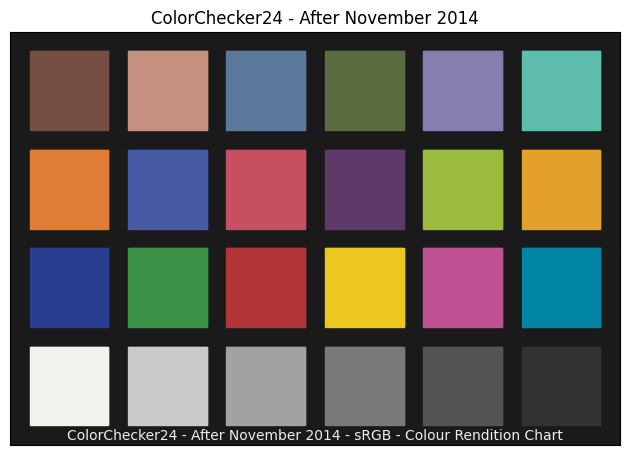

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'ColorChecker24 - After November 2014'}>)

In [4]:
ref = "ColorChecker24 - After November 2014"
cp.plot_single_colour_checker(ref, text_kwargs={"visible": False})

In [5]:
colour_names = list(cc['ColorChecker 2005'].data.keys())
# Greys
grey_names = colour_names[-6:]
raw_greys = {a[1]:a for a in zip(greys,grey_names)}
grey_names

['white 9.5 (.05 D)',
 'neutral 8 (.23 D)',
 'neutral 6.5 (.44 D)',
 'neutral 5 (.70 D)',
 'neutral 3.5 (1.05 D)',
 'black 2 (1.5 D)']

In [6]:
{a[1]:a for a in zip(greys,grey_names)}

{'white 9.5 (.05 D)': ([110.1, 0.4, 4.4], 'white 9.5 (.05 D)'),
 'neutral 8 (.23 D)': ([93.0, 0.2, 1.2], 'neutral 8 (.23 D)'),
 'neutral 6.5 (.44 D)': ([78.2, 0.2, 0.5], 'neutral 6.5 (.44 D)'),
 'neutral 5 (.70 D)': ([63.5, 0.6, 0.8], 'neutral 5 (.70 D)'),
 'neutral 3.5 (1.05 D)': ([50.0, 0.2, 0.4], 'neutral 3.5 (1.05 D)'),
 'black 2 (1.5 D)': ([37.0, 0.6, 0.3], 'black 2 (1.5 D)')}

In [112]:
from colormath.color_objects import LabColor, XYZColor, xyYColor
from colormath.color_conversions import convert_color

D65 = colour.CCS_ILLUMINANTS["CIE 1931 2 Degree Standard Observer"]["D65"]
D50 = colour.CCS_ILLUMINANTS["CIE 1931 2 Degree Standard Observer"]["D50"]

def xyY_to_Lab(xyY):
    # cm_a = xyYColor(xyY[0],xyY[1],xyY[2])
    # # lab = LabColor(0.903, 16.296, -2.22)
    # lab = convert_color(cm_a, LabColor)
    # return (lab.lab_l,lab.lab_a,lab.lab_b)
    # The colour-science conversions need to specify the illuminant
    XYZ = colour.xyY_to_XYZ(xyY)
    Lab = colour.XYZ_to_Lab(XYZ,res.x)
    return Lab

print("Name                           raw LAB                   ref LAB            dE2000")
for mycolour in grey_names:
    print(f"{mycolour[:30]:30}",end = "")
    rg = raw_greys[mycolour]
    rg2 = ([rg[0][0]*0.997-12.8,rg[0][1],rg[0][2]],rg[1])
    print(f"[{rg2[0][0]:6.2f},{rg2[0][1]:6.2f},{rg2[0][2]:6.2f}]",end = "")
    a = cc[ref].data[mycolour]
    b = xyY_to_Lab(a)
    print(f" [{b[0]:6.2f},{b[1]:6.2f},{b[2]:6.2f}]",end = "")
    # ref = xyY_to_Lab(cc[reference_set].data[mycolour])
    # for b in a[:-4]:
    #     print(f"{de(b[1], ref):10.2f}", end="")
    # aXYZ = colour.xyY_to_XYZ(cc["ColorChecker 1976"].data[mycolour])
    # bXYZ = colour.chromatic_adaptation(aXYZ, colour.xy_to_XYZ(C), colour.xy_to_XYZ(D65))
    # bLab = colour.XYZ_to_Lab(bXYZ)
    # d = colour.difference.delta_E_CIE2000(ref, bLab)
    # print(f"{d:10.2f}", end="")
    d = colour.difference.delta_E_CIE2000(rg2[0], b)
    print(f"{d:10.2f}", end="")
    print()

Name                           raw LAB                   ref LAB            dE2000
white 9.5 (.05 D)             [ 96.97,  0.40,  4.40] [ 95.19,  0.21,  4.08]      1.12
neutral 8 (.23 D)             [ 79.92,  0.20,  1.20] [ 81.29,  0.52,  1.46]      1.08
neutral 6.5 (.44 D)           [ 65.17,  0.20,  0.50] [ 66.89,  0.18,  0.81]      1.43
neutral 5 (.70 D)             [ 50.51,  0.60,  0.80] [ 50.76,  0.62,  0.84]      0.25
neutral 3.5 (1.05 D)          [ 37.05,  0.20,  0.40] [ 35.63,  0.12,  0.06]      1.24
black 2 (1.5 D)               [ 24.09,  0.60,  0.30] [ 20.64,  0.48, -0.07]      2.48


In [97]:
rg2

([22.040000000000003, 0.6, 0.3], 'black 2 (1.5 D)')

In [17]:
(a, colour.xyY_to_XYZ(a))

(array([ 0.34376747,  0.35605763,  0.03151319]),
 array([ 0.03042544,  0.03151319,  0.02656724]))

In [18]:
b

array([ 20.64      ,   0.06477426,  -0.45473989])

In [19]:
colour.XYZ_to_Lab(colour.xyY_to_XYZ(cc[ref].data[mycolour]))

array([ 20.64      ,   0.82794981,   5.16789045])

In [20]:
from colormath.color_objects import LabColor, XYZColor, xyYColor
from colormath.color_conversions import convert_color

xyY = xyYColor(a[0],a[1],a[2])
# lab = LabColor(0.903, 16.296, -2.22)
lab = convert_color(xyY, LabColor)
lab

LabColor(lab_l=20.640000000000008,lab_a=0.06890756516883534,lab_b=-0.45203090974813565)

In [21]:
(lab.lab_l,lab.lab_a,lab.lab_b)

(20.640000000000008, 0.06890756516883534, -0.45203090974813565)

In [22]:
# Bruce Lindbloom has this data for LAB reference values which seems better
bl ={
    "white 9.5 (.05 D)":[95.370,-0.644,2.583],
"neutral 8 (.23 D)":[80.984,-0.030,0.270],
"neutral 6.5 (.44 D)":[66.246,-0.101,0.056],
"neutral 5 (.70 D)":[51.244,-0.046,0.662],
"neutral 3.5 (1.05 D)":[35.379,-0.118,-0.144],
"black 2 (1.5 D)":[20.522,0.352,-0.201]}


# Linear Regression
Fit a linear regression to raw to generated grey curve from reference data and see what we get

In [100]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([raw_greys[name][0][0]  for name in grey_names])
X

array([ 110.1,   93. ,   78.2,   63.5,   50. ,   37. ])

In [101]:
Y = np.array([xyY_to_Lab(cc[ref].data[name])[0]   for name in grey_names])
Y

array([ 95.19,  81.29,  66.89,  50.76,  35.63,  20.64])

In [102]:
Y.reshape(-1, 1)

array([[ 95.19],
       [ 81.29],
       [ 66.89],
       [ 50.76],
       [ 35.63],
       [ 20.64]])

In [111]:
x1 = X[:-1].reshape(-1, 1)
y1 = Y[:-1].reshape(-1, 1)

reg = LinearRegression().fit(x1, y1)
print(f"Regression score = {reg.score(x1,y1)}")
print(F" Coefficients {reg.coef_} {reg.intercept_}")
# array([1., 2.])
# >>> reg.intercept_
# 3.0...
# >>> reg.predict(np.array([[3, 5]]))
# array([16.])


Regression score = 0.9954976711232112
 Coefficients [[ 0.99688449]] [-12.76199956]


In [104]:
reg.intercept_

array([-15.70327321])

In [105]:
[r[0] for r in Y]

IndexError: invalid index to scalar variable.

In [106]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = np.array([r[0] for r in Y])
y = np.array([r[0] for r in X])

x1 = np.array([[0,0,0], [100,0,0]])
y1 = reg.predict(x1)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)
ax.scatter(x, y)
ax.plot([x[0] for x in x1], [y[0] for y in y1], linewidth=1.0, color="red")

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

IndexError: invalid index to scalar variable.

In [107]:
x1

array([[  0,   0,   0],
       [100,   0,   0]])

In [37]:
import numpy as np

from scipy.optimize import minimize

In [ ]:
def fit_greys(

In [ ]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

res = minimize(rosen, x0, method='nelder-mead',

               options={'xatol': 1e-8, 'disp': True})

In [114]:
# ref ColourChecker defined above
print(f"Ref Colour checkern = {ref}")
def xyY_to_Lab2(xyY, illiuminant):
    # cm_a = xyYColor(xyY[0],xyY[1],xyY[2])
    # # lab = LabColor(0.903, 16.296, -2.22)
    # lab = convert_color(cm_a, LabColor)
    # return (lab.lab_l,lab.lab_a,lab.lab_b)
    # The colour-science conversions need to specify the illuminant
    XYZ = colour.xyY_to_XYZ(xyY)
    Lab = colour.XYZ_to_Lab(XYZ, illiuminant)
    return Lab

X = np.array([raw_greys[name][0]  for name in grey_names])

def test_illuminant(illuminant, verbose = False):
    sum = 0.0
    for mycolour in grey_names:
        rg = raw_greys[mycolour]
        rg2 = ([rg[0][0]*0.997-12.8,rg[0][1],rg[0][2]],rg[1])
        a = cc[ref].data[mycolour]
        b = xyY_to_Lab2(a, illuminant)
        d = colour.difference.delta_E_CIE2000(rg2[0], b)
        sum += d
    fit = sum/len(grey_names)
    # Y = np.array([xyY_to_Lab2(cc[ref].data[name], illuminant)   for name in grey_names])
    # reg = LinearRegression().fit(X, Y)
    # fit = (1-reg.score(X, Y))*100
    if verbose:
        print(f"Illuminant = {illuminant}")
        print(f"Avg dE2000 fit = {fit}")
    return fit

test_illuminant(D50, verbose = True)
test_illuminant(D65, verbose = True)

Ref Colour checkern = ColorChecker24 - After November 2014
Illuminant = [ 0.3457  0.3585]
Avg dE2000 fit = 2.021368940124141
Illuminant = [ 0.3127  0.329 ]
Avg dE2000 fit = 8.097072105968147


8.097072105968147

In [115]:
res = minimize(test_illuminant, np.array([ 0.3457,  0.3585]), method='nelder-mead',

               options={'xatol': 1e-1, 'disp': True})
res

Optimization terminated successfully.
         Current function value: 1.266882
         Iterations: 21
         Function evaluations: 41


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.26688203393
             x: [ 3.421e-01  3.576e-01]
           nit: 21
          nfev: 41
 final_simplex: (array([[ 3.421e-01,  3.576e-01],
                       [ 3.421e-01,  3.575e-01],
                       [ 3.422e-01,  3.576e-01]]), array([ 1.267e+00,  1.267e+00,  1.267e+00]))

In [119]:
dfit = res.x
print(f"Fitted illuminant {dfit[0]:6.4f} {dfit[1]:6.4f}") 

Fitted illuminant 0.3421 0.3576


In [57]:
D50

array([ 0.3457,  0.3585])

In [61]:
res.x

array([ 0.40305784,  0.54206495])